# Linear Regression

### We will learn to apply linear regression on multidimensional data using pyTorch

##### Helper class - linear_regressionpy

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import torch
import torch.nn as nn
from torch.autograd import Variable

import numpy as np

In [2]:
# PyTorch Linear Regression Class
# See linear_regression.py for detailed explaination

from linear_regression import LinearRegression

---

## Case 1 : input : (n, 1)   output : (n, 1)
#### Simple y = mx + c 

In [3]:
# Define learning rate and how many times we want to iterate through whole data (i.e. no of epochs)
num_epochs = 100
learning_rate = 0.0001

In [4]:
# np.mgrid[a:b:n]  -->  np array from a to b-1  skipping n ints in between
# np.mgrid[1:101:1].reshape(1, -1)  -->  Reshape array to be a row  (i.e. -> (1,n))
# np.array(np.mgrid[1:101:1].reshape(1, -1).T  -->  Transpose --> (n,1)

In [5]:
# y = mx + c

# putting  m = 2  and  c = 1
# y = [2*i+1 for i in x_train]

In [6]:
# numpy array of shape (n, 1)
x_train = np.array(np.mgrid[1:101:1].reshape(1, -1).T, dtype=np.float32)
y_train = np.array([2*i+1 for i in x_train], dtype=np.float32)

In [7]:
x_test = np.array(np.mgrid[200:250:1].reshape(1, -1).T, dtype=np.float32)
y_test = np.array([2*i+1 for i in x_test], dtype=np.float32)

In [8]:
# Instantiate LinearRegression model
linear_model = LinearRegression(x_train, y_train)

# Train the model
loss_array, model = linear_model.train(num_epochs, learning_rate)

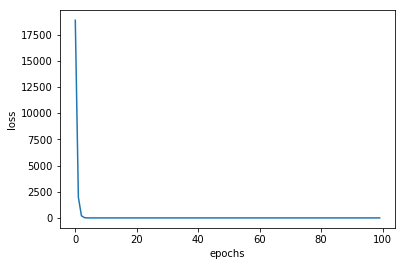

In [9]:
linear_model.plot_loss()

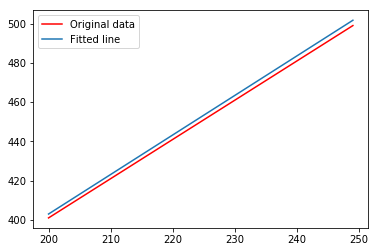

In [10]:
linear_model.plot_model(x_test, y_test)

Fitted data is nearly inline with original data

---

## Case 2 : input : (n, 2)   output : (n, 1)
####  y = m1\*x1 + m2\*x2 + c 

In [11]:
# np.mgrid[a:b:n, a:b:n]  -->  2D np array from a to b-1  skipping n ints in between
np.mgrid[1:4:1, 1:4:1]

array([[[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]],

       [[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]])

In [12]:
# np.mgrid[a:b:n, a:b:n].reshape(2, -1)  -->  Reshape array to be a row  (i.e. -> (2,n))
np.mgrid[1:4:1, 1:4:1].reshape(2, -1)

array([[1, 1, 1, 2, 2, 2, 3, 3, 3],
       [1, 2, 3, 1, 2, 3, 1, 2, 3]])

In [13]:
# np.array(np.mgrid[a:b:n, a:b:n].reshape(2, -1).T  -->  Transpose --> (n,2)

In [14]:
np.mgrid[1:4:1, 1:4:1].reshape(2, -1).T

array([[1, 1],
       [1, 2],
       [1, 3],
       [2, 1],
       [2, 2],
       [2, 3],
       [3, 1],
       [3, 2],
       [3, 3]])

In [15]:
x = np.float32(np.mgrid[1:10:1, 1:10:1].reshape(2, -1).T)
y = np.float32([2*i[0] + 3*i[1] + 4 for i in x])[:,np.newaxis]

In [16]:
x.shape, y.shape

((81, 2), (81, 1))

In [17]:
num_epochs = 100
learning_rate = 0.001

In [18]:
linear_model = LinearRegression(x, y)
loss_array, model = linear_model.train(num_epochs, learning_rate)

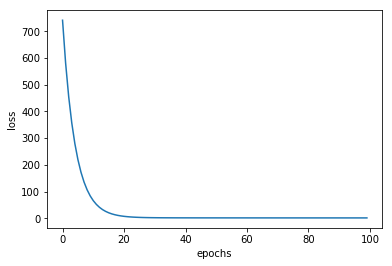

In [19]:
linear_model.plot_loss()

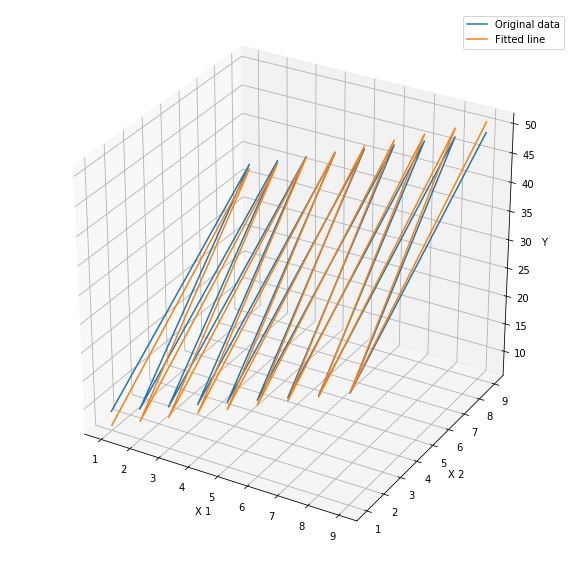

In [20]:
# We will need to plot 3D figure in this case
# as there are 3 Dimensions - x1, x2, y
linear_model.plot_3D_Model(x, y)

Predicetd numbers are nearly identical to original onput

---

## Case 3 : input : (n, 6)   output : (n, 3)

In [21]:
# Generating Data

In [22]:
np.mgrid[1:3:1, 1:3:1, 1:3:1, 1:3:1, 1:3:1, 1:3:1].shape

(6, 2, 2, 2, 2, 2, 2)

In [23]:
np.mgrid[1:10:1, 1:10:1, 1:10:1, 1:10:1, 1:10:1, 1:10:1].reshape(6, -1).shape

(6, 531441)

In [24]:
np.mgrid[1:10:1, 1:10:1, 1:10:1, 1:10:1, 1:10:1, 1:10:1].reshape(6, -1).T.shape

(531441, 6)

In [25]:
xx = np.float32(np.mgrid[1:10:1, 1:10:1, 1:10:1, 1:10:1, 1:10:1, 1:10:1].reshape(6, -1).T)

In [26]:
# y1 = m1*x1 + m2*x2 + m3*x3 + c1
# y2 = m4*x3 + m5*x4 + m6*x5 + c2
# y1 = m7*x5 + m8*x6 + m9*x1 + c3
#
# y = [y1  y2  y3]

In [27]:
a = np.float32([2*i[0] + 3*i[1] + 4*i[2] + 6 for i in xx])[:,np.newaxis]
b = np.float32([7*i[2] + 9*i[3] + 5*i[4] + 4 for i in xx])[:,np.newaxis]
c = np.float32([4*i[4] + 1*i[5] + 9*i[0] + 1 for i in xx])[:,np.newaxis]
yy = np.hstack((a, b, c))

In [28]:
xx.shape, yy.shape

((531441, 6), (531441, 3))

In [29]:
num_epochs = 50
learning_rate = 0.001

In [30]:
linear_model = LinearRegression(xx, yy)
loss_array, model = linear_model.train(num_epochs, learning_rate)

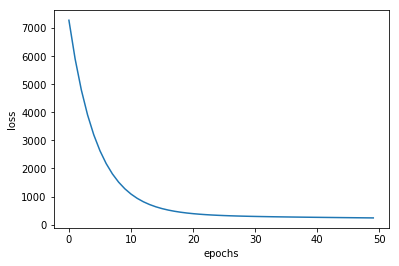

In [31]:
linear_model.plot_loss()